In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta


In [3]:
stock_data = yf.download("AAPL", start="2010-01-01", end="2023-12-31")
stock_data.to_csv("AAPL_historical_data.csv")

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3522 non-null   float64
 1   (Close, AAPL)      3522 non-null   float64
 2   (High, AAPL)       3522 non-null   float64
 3   (Low, AAPL)        3522 non-null   float64
 4   (Open, AAPL)       3522 non-null   float64
 5   (Volume, AAPL)     3522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.6 KB


In [5]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.447413,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.458557,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.355827,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.386255,7.570714,7.571429,7.466429,7.510714,447610800


In [6]:
stock_data.fillna(method='ffill' , inplace=True)
stock_data.isnull().sum()

/var/folders/1g/gs4fdq4j34g30thbykkjx7x80000gn/T/ipykernel_2347/314472537.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill' , inplace=True)


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [7]:
stock_data.reset_index(inplace=True)


In [8]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])


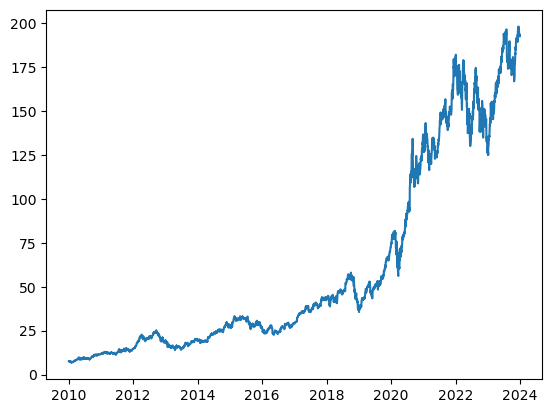

In [9]:
plt.figsize=(12,6)
plt.plot(stock_data['Date'],stock_data['Close'] )

In [10]:
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()  #SMA with 20 day rolling window

In [11]:
stock_data['EMA_20'] = stock_data['Close'].ewm(span=20, adjust=False).mean()  #EMA with 20 day rolling window

In [12]:
print(stock_data['Close'].isnull().sum())


Ticker
AAPL    0
dtype: int64


In [13]:
#RSI for strength or weakness of a stock or market
delta =stock_data['Close'].diff()

gain = delta.where(delta > 0, 0 )
loss = delta.where(delta<0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()



rs = avg_gain/avg_loss



stock_data['RSI'] = 100 - (100 / (1 + rs))


In [14]:
#Bollinger Bands

In [15]:
stock_data['Middle_Band'] =stock_data['Close'].rolling(window=20).mean()

In [16]:
stock_data['std'] = stock_data['Close'].rolling(window=20).std()

In [17]:
stock_data['Upper_Band'] = stock_data['Middle_Band'] + 2 * stock_data['std']
stock_data['Lower_Band'] = stock_data['Middle_Band'] - 2 * stock_data['std']

In [18]:
print(stock_data.columns)


MultiIndex([(       'Date',     ''),
            (  'Adj Close', 'AAPL'),
            (      'Close', 'AAPL'),
            (       'High', 'AAPL'),
            (        'Low', 'AAPL'),
            (       'Open', 'AAPL'),
            (     'Volume', 'AAPL'),
            (     'SMA_20',     ''),
            (     'EMA_20',     ''),
            (        'RSI',     ''),
            ('Middle_Band',     ''),
            (        'std',     ''),
            ( 'Upper_Band',     ''),
            ( 'Lower_Band',     '')],
           names=['Price', 'Ticker'])


In [19]:
#Rate of Change (ROC)

In [20]:
stock_data['ROC'] = ((stock_data['Close'] - stock_data['Close'].shift(10)) /stock_data['Close'].shift(10)) *100

In [21]:
#On-Balance Volume (OBV)

In [22]:
(stock_data['Volume'] * ((stock_data['Close'] - stock_data['Close'].shift(1)) > 0).astype(int)) -(stock_data['Volume'] * ((stock_data['Close'] - stock_data['Close'].shift(1)) < 0).astype(int))


Ticker,AAPL
0,0
1,601904800
2,-552160000
3,-477131200
4,447610800
...,...
3517,-37122800
3518,-28919300
3519,48087700
3520,34049900


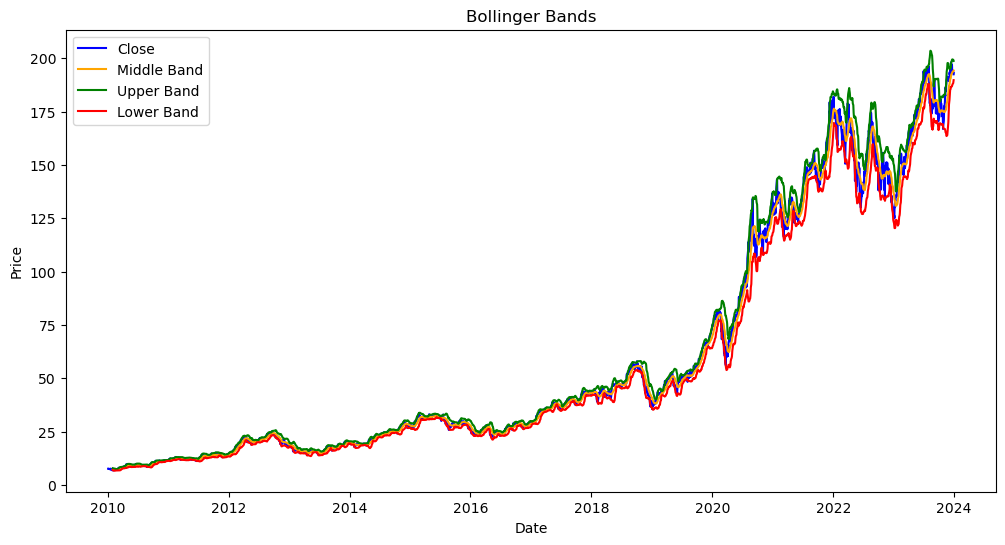

In [23]:
import matplotlib.pyplot as plt

# Plotting Bollinger Bands with Close price
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close', color='blue')
plt.plot(stock_data['Date'], stock_data['Middle_Band'], label='Middle Band', color='orange')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Band', color='green')
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Band', color='red')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title("Bollinger Bands")
plt.legend()  
plt.show()


In [24]:
# Flatten MultiIndex columns
stock_data.columns = ['_'.join(filter(None, col)).strip() for col in stock_data.columns]
print(stock_data.columns)

Index(['Date', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL',
       'Open_AAPL', 'Volume_AAPL', 'SMA_20', 'EMA_20', 'RSI', 'Middle_Band',
       'std', 'Upper_Band', 'Lower_Band', 'ROC'],
      dtype='object')


In [25]:
stock_data.rename(columns={'Volume_AAPL': 'Volume',
                           'Adj Close_AAPL': 'Adj Close',
                           'Close_AAPL': 'Close',
                           'High_AAPL':'High',
                           'Low_AAPL':'Low',
                           'Open_AAPL':'Open'
                          }, inplace=True)


In [26]:
stock_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI,Middle_Band,std,Upper_Band,Lower_Band,ROC
0,2010-01-04,6.447413,7.643214,7.660714,7.585000,7.622500,493729600,NaN,7.643214,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,6.458557,7.656429,7.699643,7.616071,7.664286,601904800,NaN,7.644473,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,6.355827,7.534643,7.686786,7.526786,7.656429,552160000,NaN,7.634013,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200,NaN,7.623222,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,6.386255,7.570714,7.571429,7.466429,7.510714,447610800,NaN,7.618222,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
stock_data['Typcal_Price'] = (stock_data['High']+ stock_data['Low'] +stock_data['Close']) /3 
stock_data['RMF'] = stock_data['Typcal_Price'] * stock_data['Volume']

stock_data['MF_positive']=np.where(stock_data['Typcal_Price'].diff() >0, stock_data['RMF'],0)
stock_data['MF_negative']=np.where(stock_data['Typcal_Price'].diff() <0, stock_data['RMF'],0)

#Money Flow Index MFI
positive_sum =stock_data['MF_positive'].rolling(window=14).sum()
negative_sum =stock_data['MF_negative'].rolling(window=14).sum()

m_ratio = positive_sum / negative_sum
stock_data['MFI'] = 100 - (100/(1+m_ratio))

In [28]:
corr_matrix = stock_data.corr()

In [29]:
corr_matrix['Close']

Date            0.885132
Adj Close       0.999950
Close           1.000000
High            0.999888
Low             0.999893
Open            0.999767
Volume         -0.529698
SMA_20          0.998050
EMA_20          0.998597
RSI             0.007097
Middle_Band     0.998050
std             0.845400
Upper_Band      0.997421
Lower_Band      0.997260
ROC             0.024090
Typcal_Price    0.999967
RMF             0.537367
MF_positive     0.263431
MF_negative     0.229453
MFI            -0.013399
Name: Close, dtype: float64

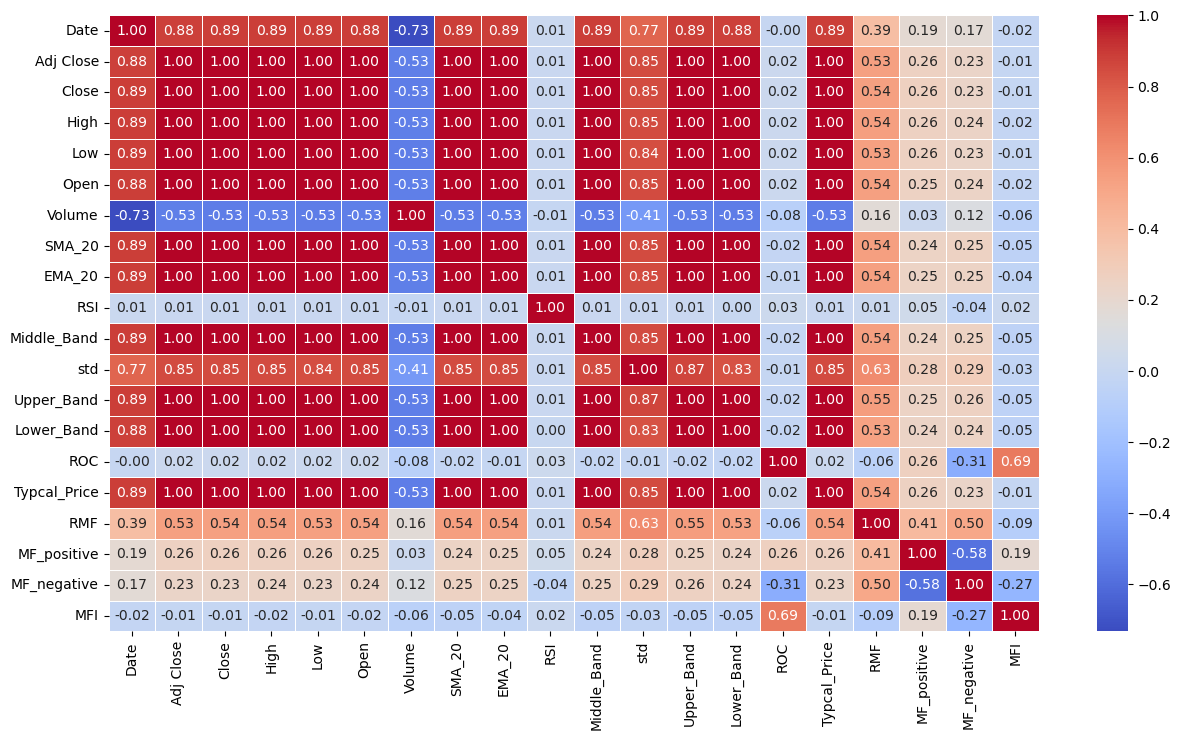

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [32]:
stock_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI,Middle_Band,std,Upper_Band,Lower_Band,ROC,Typcal_Price,RMF,MF_positive,MF_negative,MFI
0,2010-01-04,6.447413,7.643214,7.660714,7.585000,7.622500,493729600,NaN,7.643214,NaN,NaN,NaN,NaN,NaN,NaN,7.629643,3.766980e+09,0.000000e+00,0.000000e+00,NaN
1,2010-01-05,6.458557,7.656429,7.699643,7.616071,7.664286,601904800,NaN,7.644473,NaN,NaN,NaN,NaN,NaN,NaN,7.657381,4.609014e+09,4.609014e+09,0.000000e+00,NaN
2,2010-01-06,6.355827,7.534643,7.686786,7.526786,7.656429,552160000,NaN,7.634013,NaN,NaN,NaN,NaN,NaN,NaN,7.582738,4.186885e+09,0.000000e+00,4.186885e+09,NaN
3,2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200,NaN,7.623222,NaN,NaN,NaN,NaN,NaN,NaN,7.519405,3.587743e+09,0.000000e+00,3.587743e+09,NaN
4,2010-01-08,6.386255,7.570714,7.571429,7.466429,7.510714,447610800,NaN,7.618222,NaN,NaN,NaN,NaN,NaN,NaN,7.536191,3.373280e+09,3.373280e+09,0.000000e+00,NaN


In [33]:
stock_data.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI,Middle_Band,std,Upper_Band,Lower_Band,ROC,Typcal_Price,RMF,MF_positive,MF_negative,MFI
19,2010-02-01,5.866569,6.954643,7.000000,6.832143,6.870357,749876400,7.395214,7.336899,-161.508225,7.395214,0.233437,7.862088,6.928341,-5.438743,6.928929,5.195840e+09,0.000000e+00,5.195840e+09,37.003744
20,2010-02-02,5.900613,6.995000,7.011429,6.906429,6.996786,698342400,7.362804,7.304337,-218.971443,7.362804,0.242033,7.846870,6.878737,-8.919270,6.970953,4.868112e+09,4.868112e+09,0.000000e+00,41.972660
21,2010-02-03,6.002140,7.115357,7.150000,6.943571,6.970357,615328000,7.335750,7.286339,-231.260975,7.335750,0.237686,7.811121,6.860378,-5.903754,7.069643,4.350149e+09,4.350149e+09,0.000000e+00,41.872576
22,2010-02-04,5.785830,6.858929,7.084643,6.841786,7.026071,757652000,7.301964,7.245633,-151.956357,7.301964,0.255298,7.812561,6.791368,-7.699316,6.928453,5.249356e+09,0.000000e+00,5.249356e+09,37.640108
23,2010-02-05,5.888561,6.980714,7.000000,6.816071,6.879643,850306800,7.274964,7.220403,-284.813042,7.274964,0.259467,7.793898,6.756031,-1.158034,6.932262,5.894549e+09,5.894549e+09,0.000000e+00,43.088170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,2023-12-22,192.656174,193.600006,195.410004,192.970001,195.179993,37122800,193.668501,193.330404,320.383042,193.668501,2.911017,199.490535,187.846466,-1.078126,193.993337,7.201576e+09,0.000000e+00,7.201576e+09,53.500840
3518,2023-12-26,192.108841,193.050003,193.889999,192.830002,193.610001,28919300,193.831501,193.303699,-2532.468657,193.831501,2.770282,199.372064,188.290938,-0.067289,193.256668,5.588848e+09,0.000000e+00,5.588848e+09,47.643933
3519,2023-12-27,192.208374,193.149994,193.500000,191.089996,192.490005,48087700,193.969001,193.289060,1140.982461,193.969001,2.656926,199.282852,188.655150,-0.801198,192.579997,9.260729e+09,0.000000e+00,9.260729e+09,42.092570
3520,2023-12-28,192.636276,193.580002,194.660004,193.169998,194.139999,34049900,194.179501,193.316769,-1152.171605,194.179501,2.430509,199.040519,189.318484,-2.212571,193.803335,6.598984e+09,6.598984e+09,0.000000e+00,41.090239


In [34]:
stock_data.replace([np.inf, -np.inf], np.nan, inplace=True) 
stock_data.dropna(inplace=True)  
np.isinf(stock_data).sum()


Date            0
Adj Close       0
Close           0
High            0
Low             0
Open            0
Volume          0
SMA_20          0
EMA_20          0
RSI             0
Middle_Band     0
std             0
Upper_Band      0
Lower_Band      0
ROC             0
Typcal_Price    0
RMF             0
MF_positive     0
MF_negative     0
MFI             0
dtype: int64

In [35]:
stock_data.isnull().sum()

Date            0
Adj Close       0
Close           0
High            0
Low             0
Open            0
Volume          0
SMA_20          0
EMA_20          0
RSI             0
Middle_Band     0
std             0
Upper_Band      0
Lower_Band      0
ROC             0
Typcal_Price    0
RMF             0
MF_positive     0
MF_negative     0
MFI             0
dtype: int64

In [36]:
#P-Value Test

columns = stock_data.select_dtypes(include=np.number).columns.tolist()

p_values = pd.DataFrame(np.ones((len(columns) , len(columns))) , columns=columns, index=columns)

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        _,p_value=pearsonr(stock_data[columns[i]] , stock_data[columns[j]])
        p_values.iloc[i,j]=p_value
        p_values.iloc[j,i]=p_value

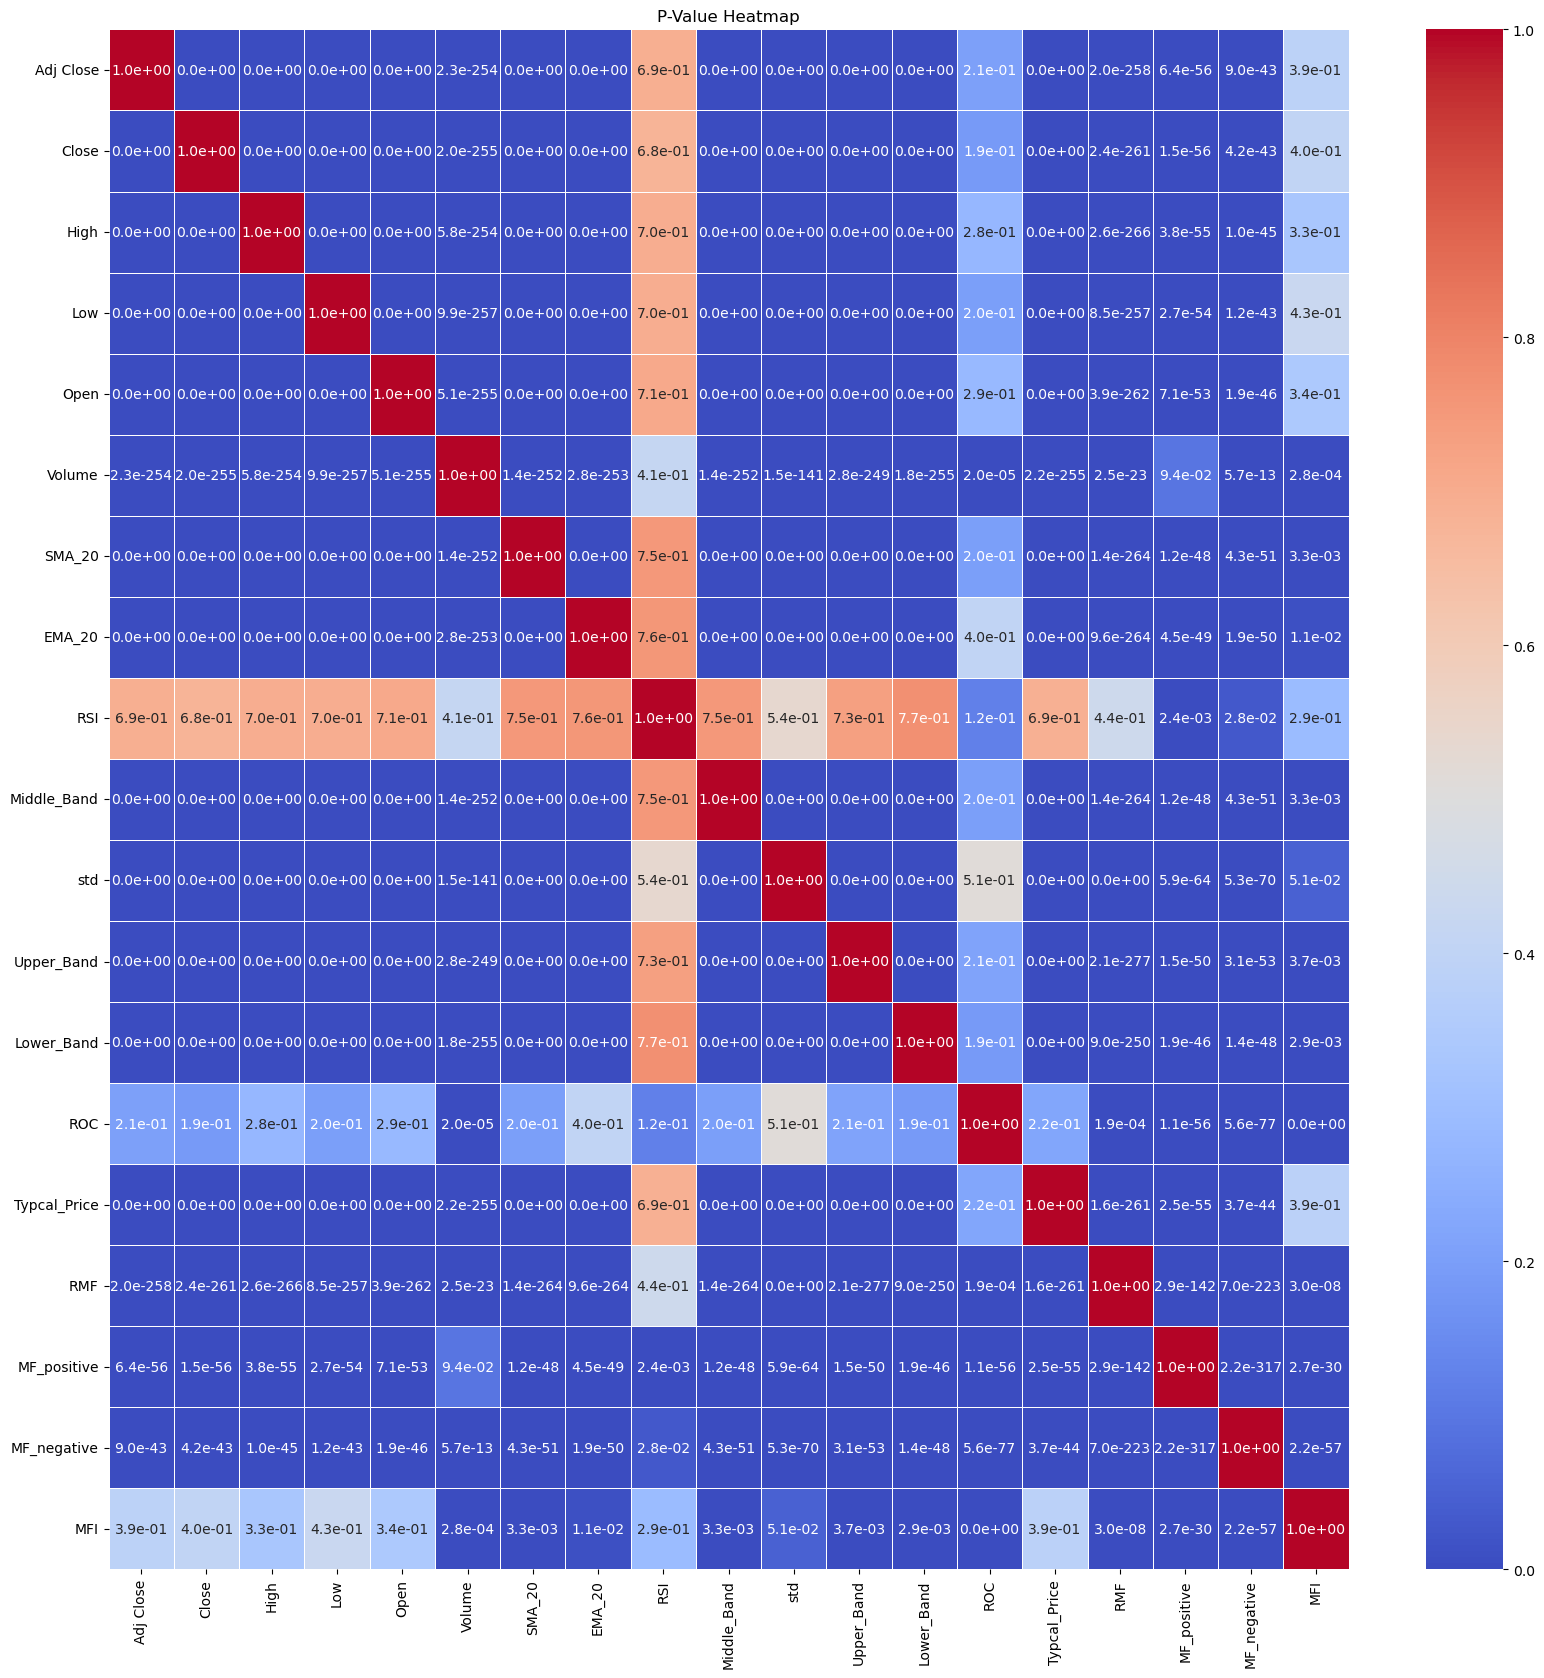

In [38]:
plt.figure(figsize=(20, 20))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt="1.1e", linewidths=0.5)
plt.title("P-Value Heatmap")
plt.show()

In [39]:
p_values_features = p_values.index[p_values['Close'] <0.05 ].tolist()
corr_features = corr_matrix.index[corr_matrix['Close'] > 0.9].tolist()

In [40]:
p_values_features

['Adj Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'SMA_20',
 'EMA_20',
 'Middle_Band',
 'std',
 'Upper_Band',
 'Lower_Band',
 'Typcal_Price',
 'RMF',
 'MF_positive',
 'MF_negative']

In [41]:
features=list(set(p_values_features + corr_features +['Date']))

In [42]:
features

['Volume',
 'Typcal_Price',
 'Date',
 'Low',
 'Upper_Band',
 'MF_positive',
 'EMA_20',
 'RMF',
 'Close',
 'std',
 'Adj Close',
 'High',
 'SMA_20',
 'Open',
 'Middle_Band',
 'MF_negative',
 'Lower_Band']

In [43]:
remove=['std','MF_negative',  'Typcal_Price']

for x in remove:
    features.remove(x)
    

In [44]:
stock_data_f=stock_data[features]


In [45]:
print(features)

['Volume', 'Date', 'Low', 'Upper_Band', 'MF_positive', 'EMA_20', 'RMF', 'Close', 'Adj Close', 'High', 'SMA_20', 'Open', 'Middle_Band', 'Lower_Band']


In [46]:
stock_data_f.set_index('Date', inplace=True)

In [47]:
stock_data_f.tail()

,Volume,Low,Upper_Band,MF_positive,EMA_20,RMF,Close,Adj Close,High,SMA_20,Open,Middle_Band,Lower_Band
Date,,,,,,,,,,,,,
2023-12-22,37122800,192.970001,199.490535,0.000000e+00,193.330404,7.201576e+09,193.600006,192.656174,195.410004,193.668501,195.179993,193.668501,187.846466
2023-12-26,28919300,192.830002,199.372064,0.000000e+00,193.303699,5.588848e+09,193.050003,192.108841,193.889999,193.831501,193.610001,193.831501,188.290938
2023-12-27,48087700,191.089996,199.282852,0.000000e+00,193.289060,9.260729e+09,193.149994,192.208374,193.500000,193.969001,192.490005,193.969001,188.655150
2023-12-28,34049900,193.169998,199.040519,6.598984e+09,193.316769,6.598984e+09,193.580002,192.636276,194.660004,194.179501,194.139999,194.179501,189.318484
2023-12-29,42628800,191.729996,198.821393,0.000000e+00,193.241839,8.222527e+09,192.529999,191.591385,194.399994,194.308501,193.899994,194.308501,189.795610


In [48]:
X = stock_data_f.drop(columns=['Adj Close'])
y = stock_data_f['Adj Close']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)
                                                

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2800 entries, 2016-09-20 to 2022-09-12
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Volume       2800 non-null   int64  
 1   Low          2800 non-null   float64
 2   Upper_Band   2800 non-null   float64
 3   MF_positive  2800 non-null   float64
 4   EMA_20       2800 non-null   float64
 5   RMF          2800 non-null   float64
 6   Close        2800 non-null   float64
 7   High         2800 non-null   float64
 8   SMA_20       2800 non-null   float64
 9   Open         2800 non-null   float64
 10  Middle_Band  2800 non-null   float64
 11  Lower_Band   2800 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 284.4 KB


In [51]:
if 'Date' in X_train.columns:
    X_train['Date'] = X_train['Date'].apply(lambda x: x.toordinal())
    
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [52]:
if 'Date' in X_test.columns:
    X_test['Date'] = X_test['Date'].apply(lambda x: x.toordinal())
    

y_pred =lin_reg.predict(X_test)

In [53]:
mse=mean_squared_error(y_test, y_pred)
print(f"Mean error: {mse}")

r2 =r2_score(y_test, y_pred)
print(f"R_squared error: {r2}")

Mean error: 0.2023921571971712
R_squared error: 0.9999329686711448


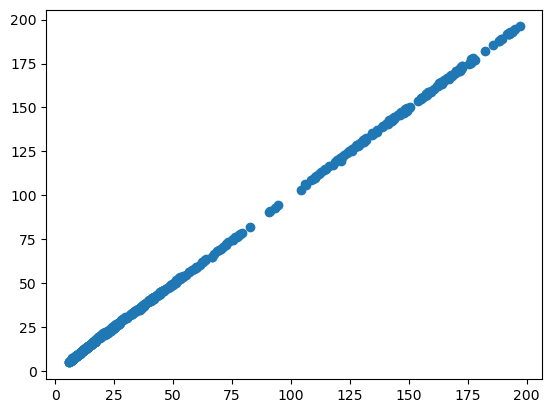

In [54]:
plt.scatter(y_test, y_pred)


In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print("Mean R²:", scores.mean())


Cross-Validation R² Scores: [0.99993629 0.99992731 0.99993681 0.99993258 0.99993761]
Mean R²: 0.9999341223030861
